# Machine Learning and Statistics

# Task 1
#### Calculates and prints to the screen the square root of 2 to 100 decimal places.
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

### Research
I start this task by looking at different square root algorithms.there are different square root algorithms (Newtons Method of Square root, Babylonian's method) both methods can be implemented in python but the main issue was 100 decimal places</br>
 

### Newtons Method of Square Root

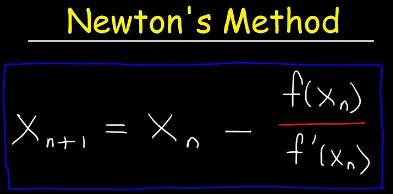

In [1]:
def approxSqrt(num):
    guess=num
    error=0.0000001
    diff=9999999
    while diff >error:
        newGuess= guess - ((guess**2-num)/(2*guess))
        
        diff= newGuess - guess
        
        if diff<0:
            diff*=-1
        
        guess=newGuess
        
    return guess
    

In [2]:
approxSqrt(2)

1.4142135623730951

Newton Method of Sqareroot:
1. Take a reasonable guess (approximate root) for the square root.

2. Add the approximate root with the original number divided by the approximate root and divide by 2.

 x_i := (x_i + n / x_i) / 2

3. Continue step 2 until the difference in the approximate root along the iterations is less than the desired value (or precision value).
4. The approximate root is the square root we want.

Reference:https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64#:~:text=Algorithm,root%20and%20divide%20by%202.&text=Continue%20step%202%20until%20the,value%20(or%20precision%20value).

In [3]:
def sqrt(x):
    root = x
    precision = 10 ** (-10)
    print(precision)
    while abs(x - root * root) > precision:
        newroot = (root + x / root) /2
        root=newroot
        
    return root
    

In [4]:
sqrt(2)

1e-10


1.4142135623746899

## Babylonian method for square root

Algorithm:
This method can be derived from (but predates) Newton–Raphson method.


1. Start with an arbitrary positive start value x (the closer to the 
   root, the better).
2. Initialize difference = 1.
3. Do following until desired approximation is achieved.
      a) Get the next approximation for root using average of x and y
      b) Set y = n/x
Ref: https://www.geeksforgeeks.org/square-root-of-a-perfect-square/

In [5]:
# Returns the square root of n. 
def squareRoot(n): 
        n=n*10**200
    # We are using n itself as 
    # initial approximation This 
    # can definitely be improved  
        x = n
        difference = 1
          
        # e decides the accuracy level 
        accuracy = 0.000001
        while(difference > accuracy): 
            x1= (x+(n//x))//2
            difference= x-x1
            x=x1
      
        print(f'{x // 10**100}.{x % 10**100:0100d}') 

In [6]:
squareRoot(2)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [7]:
# Function to return the square root of  
# a number using Newtons method  
def squareRoot(n, l) : 
  
    # Assuming the sqrt of n as n only  
    x = n  
  
    # To count the number of iterations  
    count = 0 
  
    while (1) : 
        count += 1 
  
        # Calculate more closed x  
        root = 0.5 * (x + (n / x))  
  
        # Check for closeness  
        if (abs(root - x) < l) : 
            break 
  
        # Update root  
        x = root 
  
    return root  
# source:https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/#:~:text=Let%20N%20be%20any%20number,correct%20square%20root%20of%20N.

In [8]:
squareRoot(2,0.00000001)

1.414213562373095

First try to use simple ** operator to raise the number 2  to power 1/2.

In [9]:
def sqrt2():
    root=2**(1/2)
    return root


In [10]:
print(sqrt2())
r=sqrt2()
result = str(r)[2:]# get the number after decimal point
print("The number of decimal places:",len(result))

1.4142135623730951
The number of decimal places: 16


As it is obvious that by default ** gives result to 16 decimal places but now next is to look is it possible to get 100 decimal places. look at the floating point documentation as  precision is 100 decimal digits, The float in Python is not designed for this kind of precise calculation.

In [11]:
sqrt(2*10**200)

1e-10


1.414213562373095e+100

### Next have a look at available options in python to print 100 decimal Places

In [12]:
#print("{:.100f}".format(r))
printResult = format(r, ',.100f')
  
print(printResult)


1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [13]:
# the result is printed to 100 decimal places but there are trailing zeros 
print("Total decimal places",len(str(printResult[2:])))
print(len(str(4142135623730951454746218587388284504413604736328125)))

Total decimal places 100
52


52 decimals are fine with trailing zeros

As finding a squareroot is fine but the number of decimal places is an issue here how to get 100 decimal places as searched on the net it shows that there is a library decimal which can be used to get more decimal places as use of libraries is not allowed for this task but to look at the available option I looked into it 

In [14]:
from decimal import *
getcontext().prec = 101
Decimal(2).sqrt()

Decimal('1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727')

as from the result above it is obvious that it is possible to get result to 100 decimal places but now i move forward that how can i do it without decimal libray

In [15]:
2**0.5

1.4142135623730951

when looking at different algorithms i found the squareroot of 2 and squreroot of 2*10**2 is same only difference in decimal places so is it possible to get a whole  to 100 digits

In [16]:
print(2**0.5)
print(200**0.5)
print(20000**0.5)
print((2*10**6)**0.5)
print((2*10**8)**0.5)
print((2*10**10)**0.5)


1.4142135623730951
14.142135623730951
141.4213562373095
1414.213562373095
14142.13562373095
141421.35623730952


In [17]:
def sqrt2(a, digits):
    a = a * (10**(2*digits))
    x_prev = 0
    x_next = 1 * (10**digits)
    while x_prev != x_next:
        x_prev = x_next
        #print(x_prev)
        #x_next = (x_prev + (a // x_prev)) >> 1
        x_next = (x_prev + (a // x_prev)) //2
    #return x_next
    print(f'{x_next // 10**100}.{x_next % 10**100:0100d}')
# modified from source:https://stackoverflow.com/a/5189881

In [18]:
sqrt2(2,100)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


as finding a squareroot there are algorithm for it but as the number of decimal places is and issue here how to get 100 decimal places as searched on the net it shows that there is a library decimal which can be used to get more decimal places as use of libraries is not allowed for this task but to look at the available option I looked into it 

In [19]:
from decimal import *
getcontext().prec = 100
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573')

as from the result above it is obvious that it is possible to get result to 100 decimal places but now i move forward that how can i do it without decimal libray

In [20]:
2**0.5

1.4142135623730951

In [21]:
sqrt(2,)

1e-10


1.4142135623746899

a=1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
b=1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

I come accross these two codes that complete the task requirement and now need to research the algorithm behind both of these 

## References:


1.https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation 12/10/2020

2.Approximating Square Roots w/ Newton's Method https://www.youtube.com/watch?v=tUFzOLDuvaE 12/10/2020
3.Look at the format to print 100 decimal places 19/10/2020


##  Few other codes that i come across during my research I put those in the notebook to further look at them


In [22]:
x = 2 * 10 ** 200

r = x

# test the difference point, point+1, point-1
def test_diffs(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    #print(minimised)
    #print(below_min)
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2
    
    minimised, below_min = test_diffs(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = test_diffs(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')
# source:https://stackoverflow.com/a/64278569

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [23]:
a=4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
b=4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

print(a==b)

True


In [24]:
def sqrt(number,digits_after_decimal=100):

    original_number=number # the number 
    number=str(number) # change the number to string
    list=[]
    print(len(number))
    for a in range(len(number)):
        if number[a]=='.':
            decimal_point_locaiton=a
            break
        if a==len(number)-1:
            number+='.'
            decimal_point_locaiton=a+1
            
    if decimal_point_locaiton/2!=round(decimal_point_locaiton/2):
        number='0'+number
        decimal_point_locaiton+=1
    if len(number)/2!=round(len(number)/2):
        number+='0'
    number=number[:decimal_point_locaiton]+number[decimal_point_locaiton+1:]
    decimal_point_ans=int((decimal_point_locaiton-2)/2)+1
    for a in range(0,len(number),2):
        if number[a]!='0':
            list.append(eval(number[a:a+2]))
        else:
            try:
                list.append(eval(number[a+1]))
            except IndexError:
                pass
    p=0
    c=list[0]
    x=0
    ans=''
    for a in range(len(list)):
        while c>=(20*p+x)*(x):
            x+=1
        y=(20*p+x-1)*(x-1)
        p=p*10+x-1
        ans+=str(x-1)
        c-=y
        try:
            c=c*100+list[a+1]
        except IndexError:
            c=c*100
    while c!=0:
        x=0
        while c>=(20*p+x)*(x):
            x+=1
        y=(20*p+x-1)*(x-1)
        p=p*10+x-1
        ans+=str(x-1)
        c-=y
        c=c*100
        if len(ans)-decimal_point_ans>=digits_after_decimal:
                break
    ans=ans[:decimal_point_ans]+'.'+ans[decimal_point_ans:]

    return ans
#Source: https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2
#source:https://stackoverflow.com/a/7003789

In [25]:
sqrt(2,)

1


'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

## Task 2
The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|   | A  | B  |  C |  D |Total|
|---|---|---|---|---|---|
| White Collar  | 90  | 60  |  104 | 95  |349|
|  Blue Collar |  30 | 50  |  51 |  20 |151|
|  No Collar|  30 |  40 |  45 |  35 |150|
|  Total|  150 |  150 | 200 | 150 |650|

## Chi-squared Test

There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:

1. A chi-square goodness of fit test determines if a sample data matches a population.e.g. Goodness of Fit Test.
2. A chi-square test for independence compares two variables in a contingency table to see if they are related. 
<br>In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

The formula for the chi-square statistic used in the chi square test is:
    $$\chi_c^2 = \sum \frac {(O - E)^2}{E}$$

The chi-square formula.

The subscript “c” are the degrees of freedom. “O” is your observed value and E is your expected value. 
It’s very rare that you’ll want to actually use this formula to find a critical chi-square value by hand. 

### import packages

In [26]:
#import numpy as np
import numpy as np
# import pandas as
import pandas as pd
#import matplotlib.pyplot, it is a Python 2D plotting library
import matplotlib.pyplot as plt
# import seaborn as sns, Seaborn is a library for making statistical graphics in Python
import seaborn as sns
# import scipy.stats as ss
import scipy.stats as ss


### Create the DataFrame

In [27]:
# create the pd data frame
data = {'A':[90, 30, 30], 'B':[60, 50, 40], 'C':[104, 51, 45],'D':[95, 20, 35]} 

df = pd.DataFrame(data, index =['White Collar','Blue Collar','No Collar']) 

print(df)

# Ref: code adopted from https://datatofish.com/create-pandas-dataframe/

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No Collar     30  40   45  35


In [28]:
df.sum()

A    150
B    150
C    200
D    150
dtype: int64

### make a data frame with rows and columns sum of data 

In [29]:
sums = df.select_dtypes(np.number).sum().rename('total')

# append sums to the data frame
df2=df
df2=df2.append(sums)
df2["row sum"] = df2.sum(axis=1)
print(df2)
#ref: https://stackoverflow.com/a/41286765

                A    B    C    D  row sum
White Collar   90   60  104   95      349
Blue Collar    30   50   51   20      151
No Collar      30   40   45   35      150
total         150  150  200  150      650


### calculate the expected values
For chi-squared tests, the term “expected frequencies” refers to the values we’d expect to see if the null hypothesis is true. To calculate the expected frequency for a specific combination of categorical variables (e.g., white-collar workers in neighborhood A), multiply the column total (A) by the row total (White Collar), and divide by the sample size.

Row total X Column total / Sample Size = Expected value for one table cell

To calculate the expected frequency for the Dead/Blue cell in our dataset, do the following:

- Find the row total for Whit Collar (349)
- Find the column total for A (150)
- Multiply those two values and divide by the sample size (650)

$${150\times {\frac {349}{650}}\approx 80.54}$$

If the null hypothesis is true, we’d expect to see 80.54 White Collar in neighbourhood A  in our sample. 

Blue	Gold	Red	Row total
Dead	7 (12.65)	9 (5.12)	24 (22.23)	40
Alive	129 (123.35)	46 (49.88)	215 (216.77)	390
Column% (Expected Dead)	9.3%	9.3%	9.3%	
In this table, notice how the column percentages for the expected dead are all 9.3%. This equality occurs when the null hypothesis is valid, which is the condition that the expected values represent.

In [30]:
#look at the optionsto calculate the expected values
print(df2.loc["total"]*349/650)

A           80.538462
B           80.538462
C          107.384615
D           80.538462
row sum    349.000000
Name: total, dtype: float64


In [48]:
# first look at how to manipulate the data in dataframe

first = df.loc["White Collar"]
first_sum= first.sum()
second = df.loc["Blue Collar"]
second_sum= second.sum()
third = df.loc["No Collar"]
third_sum= third.sum()
expected_df=df2
#print(expected_df.loc["White Collar"])
#expected_df= df2.apply(lambda x: x*first_sum/650  if x.name == 'A' else x, axis=1)
# Apply a function to one column and assign it back to the column in dataframe
#expected_df= df2.apply(lambda x: x *first_sum/650  if x.name == 'total' else x)
# creating a list of dataframe columns 
#col=df2.head(3)
arr = df2.values
print(arr)
rowSum = arr[:3,4:5]
arr = arr[:,0:4]
print("Row sum:\n",rowSum)

columnSum= arr[3: ,]
print("Column Sum\n",columnSum)
arr = arr[0:3,0:4]
print(arr)
result= total*rowSum/650
#result = np.sqrt((arr**2).reshape(arr.shape[0],-1,3).sum(axis=-1))/times[:,None]
#result = pd.DataFrame(result, columns=['Velocity_%s'%(x,) for x in list('AB')])
#source: modified from https://stackoverflow.com/a/20875641
print(result)


[[ 90  60 104  95 349]
 [ 30  50  51  20 151]
 [ 30  40  45  35 150]
 [150 150 200 150 650]]
Row sum:
 [[349]
 [151]
 [150]]
Column Sum
 [[150 150 200 150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


### Contingency Table with the Expected Values
I’ll calculate the expected values for all 12 cells that represent the combinations of the three Classes and four neighbourhood.


In [50]:
result1 = pd.DataFrame(result, columns=['Expected(%s)'%(x,) for x in list('ABCD')], index =['White Collar','Blue Collar','No Collar']) 
print(result1)

              Expected(A)  Expected(B)  Expected(C)  Expected(D)
White Collar    80.538462    80.538462   107.384615    80.538462
Blue Collar     34.846154    34.846154    46.461538    34.846154
No Collar       34.615385    34.615385    46.153846    34.615385


### Observed values

In [45]:
print(df)

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No Collar     30  40   45  35


### To calculate the chi-squared statistic,
take the difference between a pair of observed (O) and expected values (E), square the difference, and divide that squared difference by the expected value. Repeat this process for all cells in the contingency table and sum those values. The resulting value is χ2. 

In [44]:
arr=df.values
table_result=np.square(arr-result)/result
print(table_result)

              Expected_A  Expected_B  Expected_C  Expected_D
White Collar    1.111527    5.237602    0.106678    2.596723
Blue Collar     0.673968    6.590083    0.443327    6.325183
No Collar       0.615385    0.837607    0.028846    0.004274


In [55]:
print(table_result.sum())
print("The chi-squared value:",sum(table_result.sum()))
 

Expected_A     2.400880
Expected_B    12.665292
Expected_C     0.578851
Expected_D     8.926179
dtype: float64
The chi-squared value: 24.571202858582602


The sum of these quantities over all of the cells is the test statistic; in this case,is approx 24.6

###  important considerations about chi-squared values:

Zero represents the null hypothesis. If all your observed frequencies equal the expected frequencies exactly, the chi-squared value for each cell equals zero, and the overall chi-squared statistic equals zero. Zero indicates your sample data exactly match what you’d expect if the null hypothesis is correct.

Squaring the differences ensures both that cell values must be non-negative and that larger differences are weighted more than smaller differences. A cell can never subtract from the chi-squared value.

Larger values represent a greater difference between sample data and the null hypothesis. Chi-squared tests are one-tailed tests rather than the more familiar two-tailed tests. The test determines whether the entire set of differences exceeds a significance threshold. If your χ2 passes the limit, your results are statistically significant! You can reject the null hypothesis and conclude that the variables are dependent–a relationship exists.

### Degree of freedom
For a table with r rows and c columns, the method for calculating degrees of freedom for a chi-square test is (r-1) (c-1). For our example, we have three rows and four columns: (3-1) * (4-1) = 12 df.

## calculate using scipy.stats library

In [54]:
# Chi-squared tests of independence determine whether a relationship exists between two categorical variables.
#Row total X Column total / Sample Size = Expected value for one table cell
#Contingency Table with the Expected Values
#sample size=N=650
#The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df.values
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f,\ncritical=%.3f,\nstat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.5f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# source: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]
dof=6
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
probability=0.950,
critical=12.592,
stat=24.571
Dependent (reject H0)
significance=0.050, p=0.00041
Dependent (reject H0)


# Refrences
1. Chi-Square Statistic: How to Calculate It / Distribution https://www.statisticshowto.com/probability-and-statistics/chi-square/
2. How the Chi-Squared Test of Independence Works https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/#:~:text=To%20calculate%20the%20chi%2Dsquared,resulting%20value%20is%20%CF%872.
3. Handling The Chi Square in Statistics with Python https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af